# Classification Neural Network

In [5]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [6]:
# Creaye data
from sklearn.datasets import make_circles

# 1000 circles
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

## Function to visualise predictions of the model

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # create x values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # make predictions
    y_pred = model.predict(x_in)
    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi-class classification")
        # so, we re-shaping our pred for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Non-linear models

## Model 1

In [8]:
# Create a model
model_nl1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_nl1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history1 = model_nl1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.9749 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7559 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7060 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6173 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5539 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5458 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5440 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5423 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5406 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5388 - accuracy: 0.4730
Epoch 11/

313/313 [==============================] - 1s 4ms/step
Doing binary classification


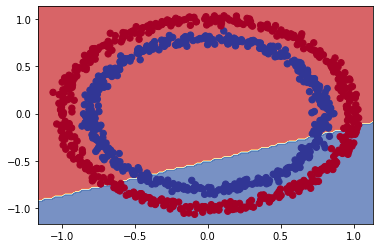

In [9]:
plot_decision_boundary(model_nl1, X, y)

## Model 2

In [10]:
# Create a model
model_nl2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_nl2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
model_nl2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 4.3245 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7418 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 2.4210 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1177 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9937 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9209 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8696 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8317 - accuracy: 0.4990
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7998 - accuracy: 0.4700
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7759 - accuracy: 0.4220
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


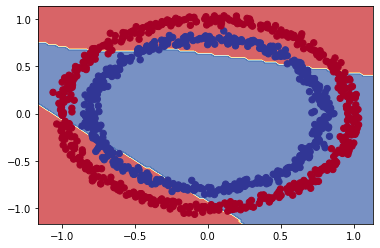

In [11]:
plot_decision_boundary(model_nl2, X, y)

## Model 3

In [12]:
# Create a model
model_nl3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history3 = model_nl3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6884 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5150
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5280
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5310
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5330
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5310
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5340
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5420
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5400
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


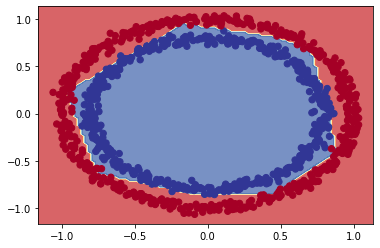

In [13]:
plot_decision_boundary(model_nl3, X, y)

## Model evaluation

In [14]:
# Mock tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

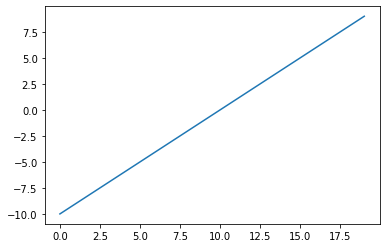

In [15]:
plt.plot(A)

In [16]:
# Replicating sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

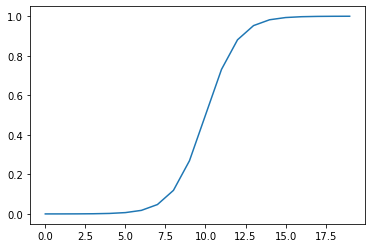

In [17]:
# Apply sigmoid to mock tensor and plot it
plt.plot(sigmoid(A))

In [18]:
# Replicating relu function
def relu(x):
    return tf.maximum(0, x)

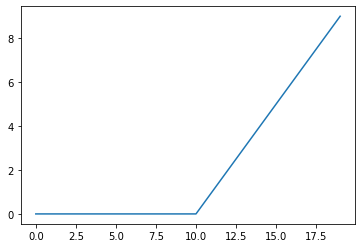

In [19]:
# Aply relu function to mock tensor and plot it
plt.plot(relu(A))

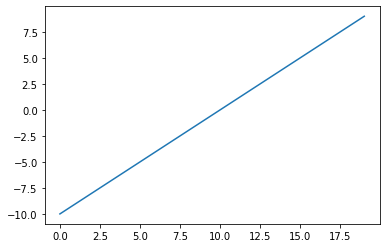

In [20]:
# Checking linear function
plt.plot(tf.keras.activations.linear(A))

In [21]:
# Does linear activation changes anything in tendor? No!
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Splitting dataset into training and testing parts

In [22]:
len(X)

1000

In [23]:
# 80/20 split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [24]:
# Create a model
model_nl4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# Fit the model
history4 = model_nl4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.5400
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6087
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.6550
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6288
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6288
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7000
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.7575
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5418 - accuracy: 0.7675
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.7950
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.8062
Epoch 11/25
25/25 [

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


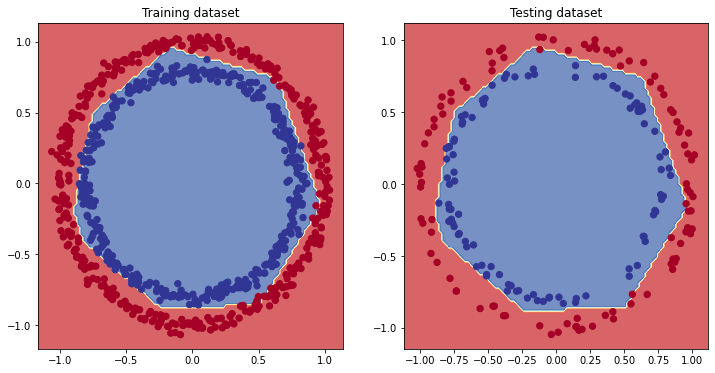

In [25]:
# Plot the decision boundaries for training and testing datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model=model_nl4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing dataset")
plot_decision_boundary(model_nl4, X_test, y_test)